In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append("../")

from utils_common import EvalData

## Extracting Test Data

In [3]:
# pre-trained model
# model_file_name = "models/modelnet_noisy.pth"

In [4]:
labels = ["modelnet noisy (deepgmr)",
          "shapenet.sim.easy", "shapenet.sim.medium", "shapenet.sim.hard",
          "shapenet.real.easy", "shapenet.real.medium", "shapenet.real.hard"]

files = []
# evaluated on: modelnet_noisy (deepgmr)
files.append("../runs/Nov29_22-35-41_spark-agent/eval_data.pkl")

# evaluated on: shapenet.sim.easy
files.append("../runs/Nov29_22-36-14_spark-agent/eval_data.pkl")

# evaluated on: shapenet.sim.medium
files.append("../runs/Nov29_22-37-12_spark-agent/eval_data.pkl")

# evaluated on: shapenet.sim.hard
files.append("../runs/Nov29_22-37-59_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.easy
files.append("../runs/Nov29_22-38-48_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.medium
files.append("../runs/Nov29_22-39-55_spark-agent/eval_data.pkl")

# evaluated on: shapenet.real.hard
files.append("../runs/Nov29_22-40-56_spark-agent/eval_data.pkl")

In [6]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData() 
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
    eval_data.complete_eval_data()
    
    data[label] = eval_data.data

label:  modelnet noisy (deepgmr)
loading file:  ../runs/Nov29_22-35-41_spark-agent/eval_data.pkl
label:  shapenet.sim.easy
loading file:  ../runs/Nov29_22-36-14_spark-agent/eval_data.pkl
label:  shapenet.sim.medium
loading file:  ../runs/Nov29_22-37-12_spark-agent/eval_data.pkl
label:  shapenet.sim.hard
loading file:  ../runs/Nov29_22-37-59_spark-agent/eval_data.pkl
label:  shapenet.real.easy
loading file:  ../runs/Nov29_22-38-48_spark-agent/eval_data.pkl
label:  shapenet.real.medium
loading file:  ../runs/Nov29_22-39-55_spark-agent/eval_data.pkl
label:  shapenet.real.hard
loading file:  ../runs/Nov29_22-40-56_spark-agent/eval_data.pkl


## ADD-S and ADD-S (AUC)

In [7]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,modelnet noisy (deepgmr),shapenet.sim.easy,shapenet.sim.medium,shapenet.sim.hard,shapenet.real.easy,shapenet.real.medium,shapenet.real.hard
adds_th_score,0.540179,0.449219,0.445312,0.398438,0.000000,0.000000,0.000000
adds_auc,0.565217,0.539699,0.522411,0.522422,0.008646,0.008717,0.009853


## Distribution of Error Metrics

In [8]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [9]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

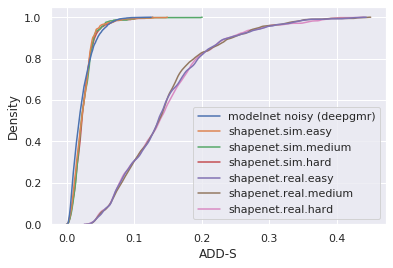

In [10]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

In [11]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [12]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

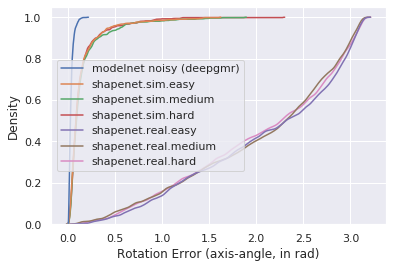

In [13]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [14]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


In [15]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

Text(0.5, 0, 'Translation Error')

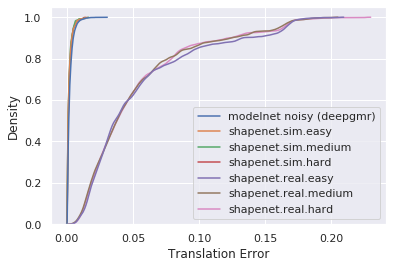

In [16]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')

## Conclusion

1. The pre-trained DeepGMR model works well on modelnet and full point clouds. Unlike PointNetLK, it doesn't show considerable degradation, when there is high rotation errors.

2. The DeepGMR, however, suffers badly in presense of occlusions.